In [22]:
import requests
import pandas

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

r = requests.get("https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/kosatce.csv")
open("kosatce.csv", "wb").write(r.content)

1043

In [4]:
kosatce = pandas.read_csv("kosatce.csv")
kosatce

,target,sepal length (cm),petal length (cm)
0,1,7.0,4.7
1,1,6.4,4.5
2,1,6.9,4.9
3,1,5.5,4.0
4,1,6.5,4.6
...,...,...,...
95,0,6.7,5.2
96,0,6.3,5.0
97,0,6.5,5.2
98,0,6.2,5.4


In [5]:
kosatce.isna().sum()

target               0
sepal length (cm)    0
petal length (cm)    0
dtype: int64

In [7]:
kosatce["target"].value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

Načti si data do proměnných X a y

In [10]:
X=kosatce.drop(columns=["target"])
y=kosatce["target"]

Rozděl data na trénovací a testovací (velikost testovacích dat nastav na 30% a nezapomeň nastavit proměnnou random_state, aby tvoje výsledky byly reprodukovatelné)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=13)

Pokud použijeme stejný algoritmus jako v prvním úkolu, tj. KNeighborsClassifier, je možné předpovědět typ kosatce na základě těchto dat tak, aby metrika f1_score dosáhla alespoň 85%?

In [14]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

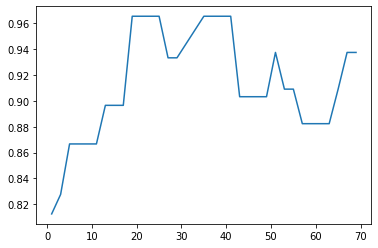

In [30]:
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69]
f1_scores=[]

for k in ks:
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(ks,f1_scores)





Ano, metrika f1 score bude vyšší než 85%, pokud pro parametr k zvolíme číslo 5 a vyšší.